In [1]:
import cv2
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa
 
img = cv2.imread('D:\Hanal\pills_img\A11AOOOOO042301.jpg')
gt = np.loadtxt('./gt.txt', dtype = np.int, delimiter = ',')
 
input_img = img[np.newaxis, :, :, :]
bbox = [ia.BoundingBox(x1 = gt[0], y1 = gt[1], x2 = gt[2], y2 = gt[3])]
 
seq = iaa.Sequential([
    iaa.Multiply((1.2, 1.5)),
    iaa.Affine(
        scale = (0.5, 0.7),
        rotate = 45)])
 
aug_img, aug_bbox = seq(images = input_img, bounding_boxes = bbox)
draw = aug_bbox[0].draw_on_image(aug_img[0], size = 2, color = [0,0,255])
res = np.hstack((img, draw))
cv2.imshow('res', res) 

OSError: ./gt.txt not found.

In [ ]:
import cv2
 
# 이미지 읽기
img_color = cv2.imread('D:\Hanal\pills_img\A11AOOOOO042301.jpg', cv2.IMREAD_COLOR)
 
# 컬러 이미지를 그레이스케일로 변환
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
 
# 이미지 사이즈 변경
img_gray_reduced = cv2.resize(img_gray, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA) # 가로, 세로 모두 반으로 줄이기
 
# 이미지 보여주기
cv2.imshow('color', img_color) # color라는 이름의 윈도우 안에 img_color라는 이미지를 보여줌
cv2.imshow('gray-scale', img_gray)
cv2.imshow('gray-scale reduced', img_gray_reduced)
 
cv2.waitKey(0)
cv2.destroyAllWindows()
 
# 이미지 저장
cv2.imwrite('result.jpg', img_gray_reduced) #img_gray_reduced를 result.jpg 이미지 파일로 저장
 

In [ ]:
import cv2
 
img = cv2.imread('D:\Hanal\pills_img\A11AOOOOO042301.jpg', cv2.IMREAD_COLOR)
 
img90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE) # 시계방향으로 90도 회전
img180 = cv2.rotate(img, cv2.ROTATE_180) # 180도 회전
img270 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE) # 반시계방향으로 90도 회전 
                                                         # = 시계방향으로 270도 회전
 
cv2.imshow('original', img)
cv2.imshow('rotate90', img90)
cv2.imshow('rotate180', img180)
cv2.imshow('rotate270', img270)
 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2

src = cv2.imread("D:\Hanal\pills_img\A11AOOOOO042301.jpg", cv2.IMREAD_COLOR)
dst = cv2.blur(src, (9, 9), anchor=(-1, -1), borderType=cv2.BORDER_DEFAULT)

cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
import numpy as np
import os
import cv2
def noisy(noise_typ,image):
   if noise_typ == "gauss":
      row,col,ch= image.shape
      mean = 0
      var = 0.1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy
   elif noise_typ == "s&p":
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = 0.004
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
  elif noise_typ == "poisson":
      vals = len(np.unique(image))
      vals = 2 ** np.ceil(np.log2(vals))
      noisy = np.random.poisson(image * vals) / float(vals)
      return noisy
  elif noise_typ =="speckle":
      row,col,ch = image.shape
      gauss = np.random.randn(row,col,ch)
      gauss = gauss.reshape(row,col,ch)        
      noisy = image + image * gauss
      return noisy

In [ ]:
import cv2

import numpy as np

import matplotlib.pyplot as plt

 

# [0, 1] 사이의 범위의 부동소수점 데이터 타입으로 변환

img = cv2.imread('D:\Hanal\pills_img\A11AOOOOO042301.jpg').astype(np.float32) / 255


# noise 추가

noise = (img + 0.2 * np.random.rand(*img.shape).astype(np.float32))

gauss_blur = cv2.GaussianBlur(noise, (7, 7), 0)

median_blur = cv2.medianBlur((noise * 255).astype(np.uint8),7)

noise = noise.clip(0, 1)

plt.imshow(noise[:, :, [2,1,0]])

plt.imshow(gauss_blur [:, :, [2,1,0]])

plt.imshow(median_blur[:, :, [2,1,0]])

plt.show()

In [2]:
import cv2

import numpy as np

import matplotlib.pyplot as plt

 

origin_img = cv2.imread('D:\Hanal\pills_img\A11AOOOOO042301.jpg', 0) # gray scale

#origin_img = origin_img / 255

 

# basic threshold

threshold, mask = cv2.threshold(origin_img, 200, 1, cv2.THRESH_BINARY)

print('값: ', threshold)

 

# adapt threshold

adapt_mask = cv2.adaptiveThreshold(origin_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 10)

 

# visualization

plt.figure(figsize=(10,3))

plt.subplot(131)

plt.axis('off')

plt.title('origin_img')

plt.imshow(origin_img, cmap='gray')

plt.subplot(132)

plt.axis('off')

plt.title('binary threshold')

plt.imshow(mask, cmap='gray')

plt.subplot(133)

plt.axis('off')

plt.title('adaptive threshold')

plt.imshow(adapt_mask, cmap='gray')

plt.tight_layout()

plt.show()


값:  200.0


<Figure size 1000x300 with 3 Axes>

In [3]:
#밝기 조정
import numpy as np
import cv2

src=cv2.imread('D:\Hanal\pills_img\A11AOOOOO042301.jpg',cv2.IMREAD_GRAYSCALE)
add_dst=cv2.add(src,30)
sub_dst=cv2.subtract(src,50)

cv2.imshow('src',src)
cv2.imshow('add_dst',add_dst)
cv2.imshow('sub_dst',sub_dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
#모폴로지 그라디언트
import os
import numpy as np
import cv2

path=os.path.join('img','D:\Hanal\pills_img\A11AOOOOO042301.jpg')
src=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
op_idx={
    'gradient':cv2.MORPH_GRADIENT
}
def onChange(k,op_name):
    if k==0:
        cv2.imshow(op_name,src)
    kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(k,k))
    dst=cv2.morphologyEx(src,op_idx[op_name],kernel)
    
cv2.imshow('gradient',src)
cv2.createTrackbar('k','gradient',0,300,lambda x: onChange(k=x,op_name='gradient'))
cv2.waitKey()
cv2.destroyAllWindows()
    


In [5]:
import os
import cv2
import numpy as np

path=os.path.join('img','D:\Hanal\pills_img\A11AOOOOO042301.jpg')
src=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
src=cv2.resize(src,None,fx=2,fy=2)

def onChange(val):
    if val<3:
        cv2.imshow('adaptiveThreshold',src)
    if val%2==0:
        val=val-1
    dst=cv2.adaptiveThreshold(src,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,
                             blockSixe=val,C=5)
    cv2.imshow('adaptiveThreshold',dst)

cv2.imshow('adaptiveThreshold',src)
cv2.createTrackbar('block size','adaptiveThreshold',0,200,onChange)

cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.5.2) :-1: error: (-5:Bad argument) in function 'adaptiveThreshold'
> Overload resolution failed:
>  - Required argument 'blockSize' (pos 5) not found
>  - Required argument 'blockSize' (pos 5) not found


error: OpenCV(4.5.2) :-1: error: (-5:Bad argument) in function 'adaptiveThreshold'
> Overload resolution failed:
>  - Required argument 'blockSize' (pos 5) not found
>  - Required argument 'blockSize' (pos 5) not found


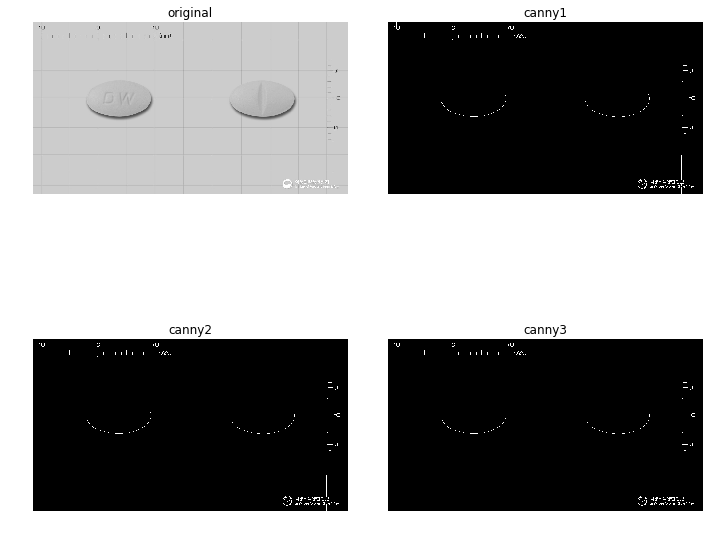

In [6]:
#캐니엣지

import cv2
import numpy as np
import matplotlib.pyplot as plt
img3 = cv2.imread('D:\Hanal\pills_img\A11AOOOOO042301.jpg', cv2.IMREAD_GRAYSCALE)

canny1 = cv2.Canny(img3, 50, 200)
canny2 = cv2.Canny(img3, 100, 200)
canny3 = cv2.Canny(img3, 170, 200)

titles = ['original', 'canny1', 'canny2', 'canny3']
images = [img3, canny1, canny2, canny3]

cv2.imshow('original', img3)
cv2.imshow('canny1', canny1)
cv2.imshow('canny2', canny2)
cv2.imshow('canny3', canny3)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    
plt.tight_layout()
plt.show()


In [7]:
src = cv2.imread('D:\Hanal\pills_img\A11AOOOOO042301.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()


# or 연산자로 OTSU 인자 입력
# 반환값 2개, 1개는 OTSU 임계값(실수형), 1개는 dst영상
# cv2.THRESH_OTSU 만 입력해도 됌
th, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print("otsu's threshold:", th)  # 131

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

otsu's threshold: 154.0


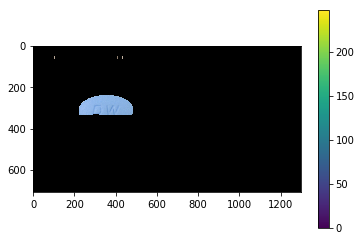

(<matplotlib.image.AxesImage at 0x1f9a5812cc0>,
 None)

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('D:\Hanal\pills_img\A11AOOOOO042301.jpg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

In [9]:
#이미지 선따기
import cv2

image = cv2.imread('D:\Hanal\pills_img\A11AOOOOO042301.jpg')
imageHeight,imageWidth=image.shape[:2]
resizeHeight = int(0.1* imageHeight)
resizeWidth=int(0.2*imageWidth)
image=cv2.resize(image,(resizeHeight,resizeWidth), interpolation=cv2.INTER_CUBIC)
##gray scale
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
##blur
blur=cv2.bilateralFilter(gray,9,75,75)
##sharpning
kernel_sharpen=np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
sharp=cv2.filter2D(blur,-1,kernel_sharpen)

canny=cv2.Canny(sharp,30,70)

#threshold
ret, thresh=cv2.threshold(sharp,150,255,cv2.THRESH_TOZERO)
#morphology
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel)
#canny
canny=cv2.Canny(opening,30,70)
img=canny

cv2.imshow('Show Image',img)
cv2.waitKey()


-1